# Difference in Differences with sci-kit learn models

In [6]:
import causalpy as cp

In [7]:
data = cp.load_data("did")

In [8]:
result = cp.DifferenceInDifferences(
    data,
    formula="y ~ 1 + group*post_treatment",
    time_variable_name="t",
    group_variable_name="group",
    treated=1,
    untreated=0,
    model=cp.skl_models.LinearRegression(),
)

NameError: name 'causal_impact' is not defined

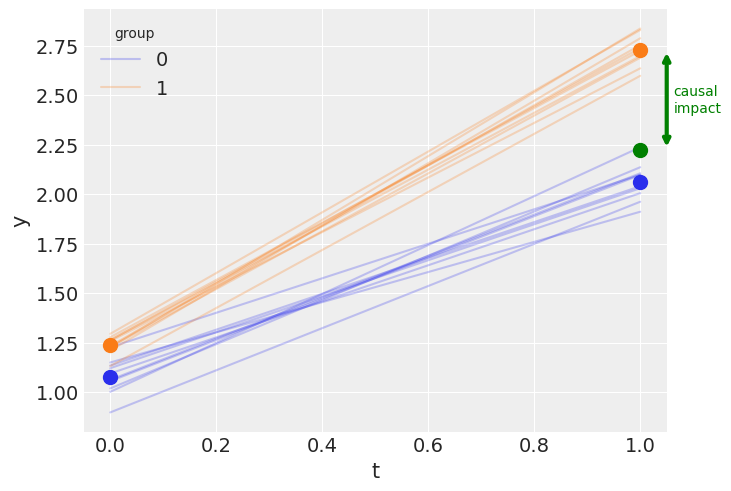

In [9]:
fig, ax = result.plot(round_to=3)

In [10]:
result.summary(round_to=3)

===========================Difference in Differences============================
Formula: y ~ 1 + group*post_treatment

Results:


AttributeError: 'numpy.ndarray' object has no attribute 'quantile'